# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [46]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/evalee/Desktop/ML100Days/data'

In [13]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/evalee/Desktop/ML100Days/data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [12]:
# 先篩選數值型的欄位
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin([float, int]))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2))])
print('Numbers of remain columns', len(numeric_columns))

Numbers of remain columns 65


D:\anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


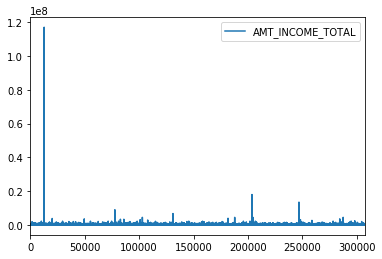

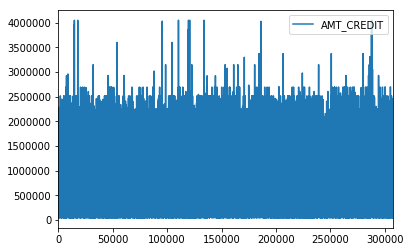

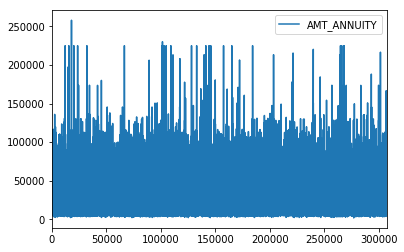

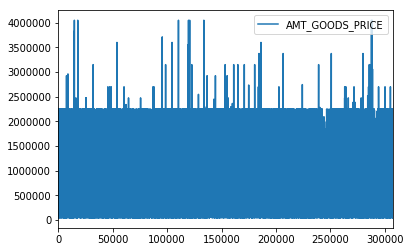

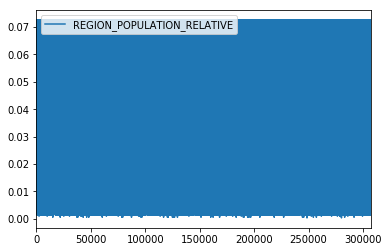

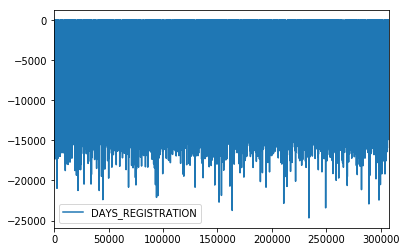

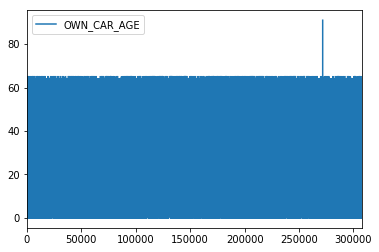

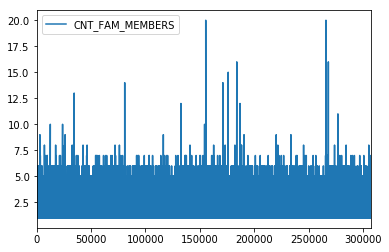

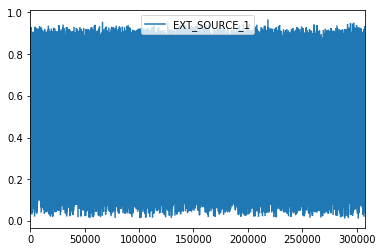

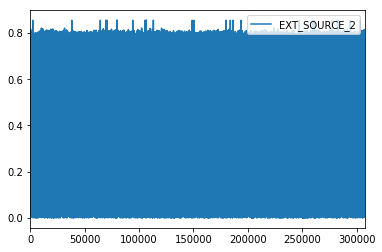

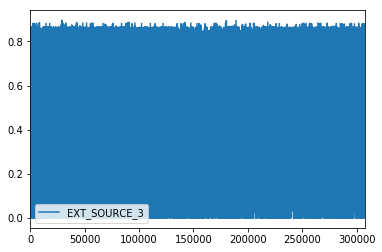

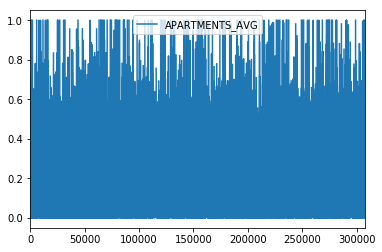

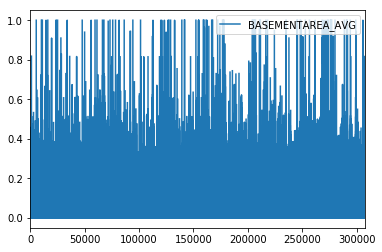

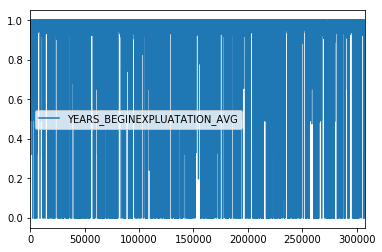

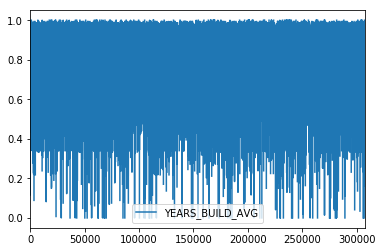

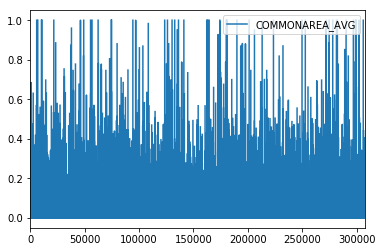

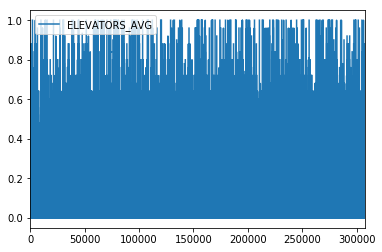

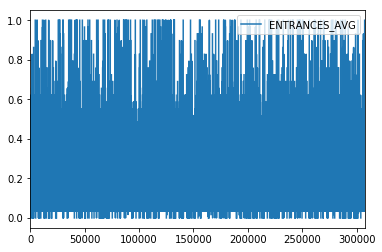

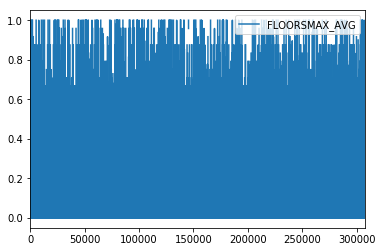

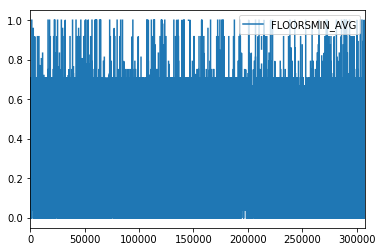

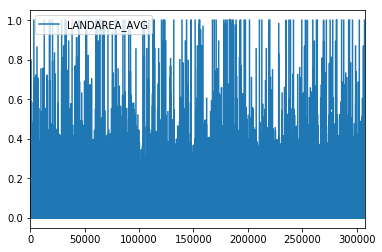

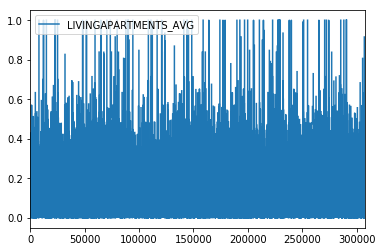

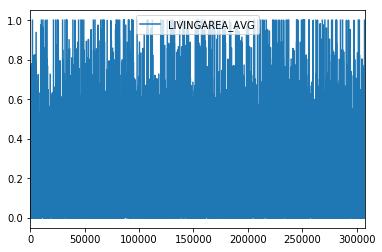

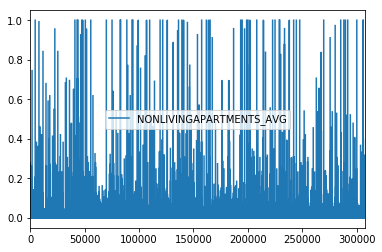

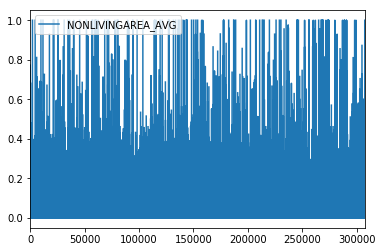

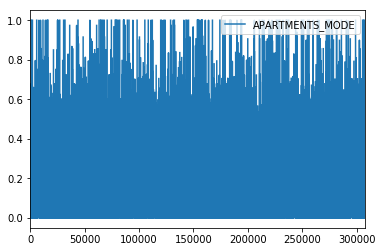

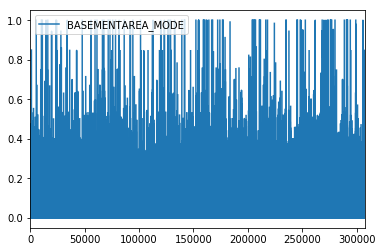

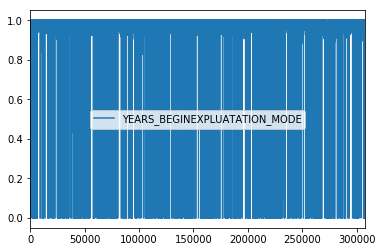

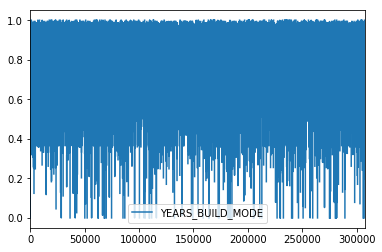

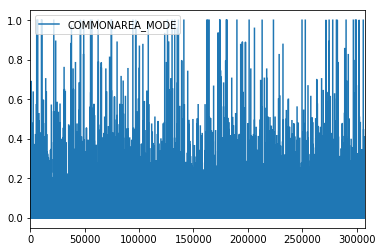

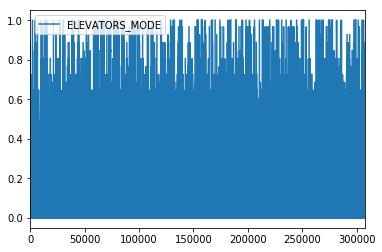

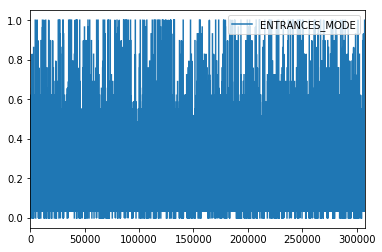

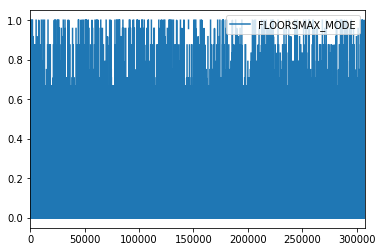

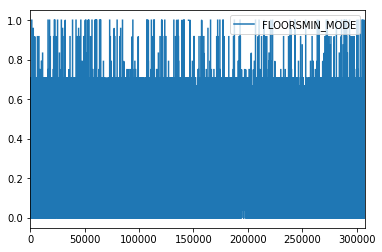

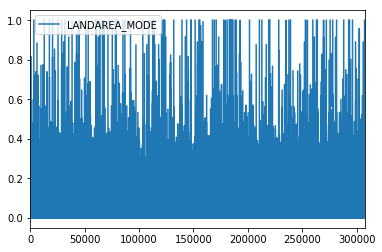

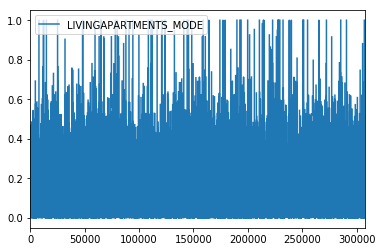

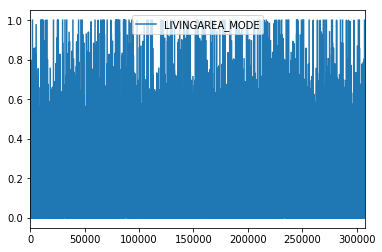

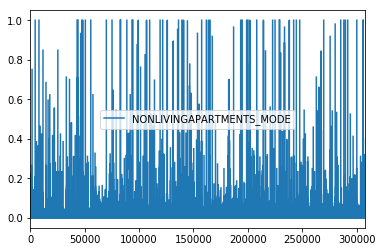

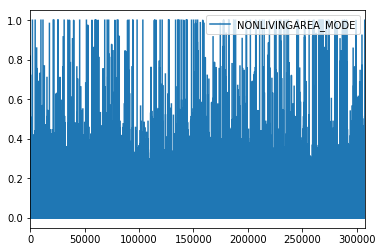

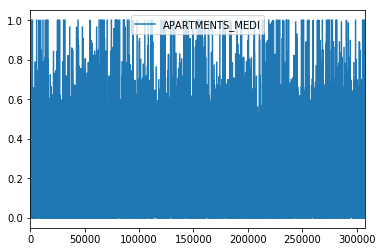

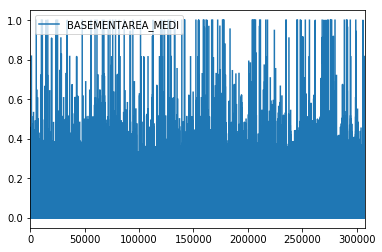

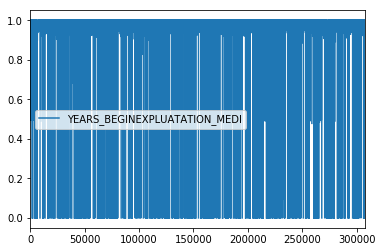

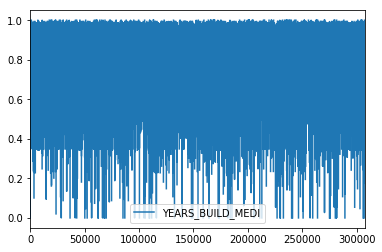

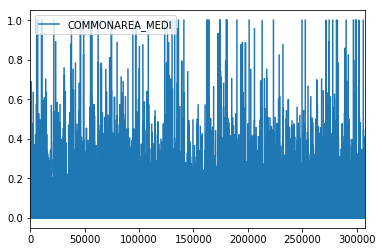

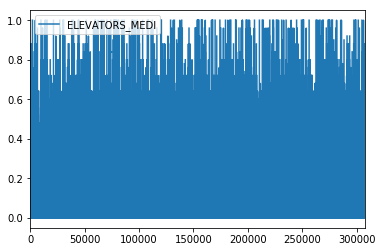

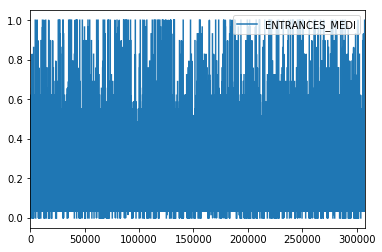

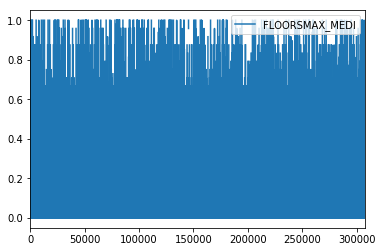

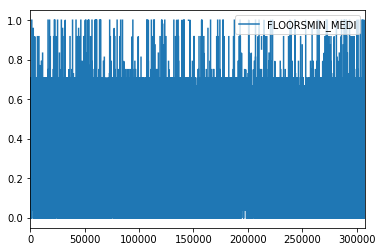

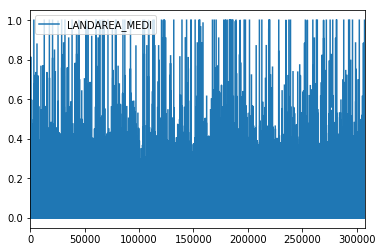

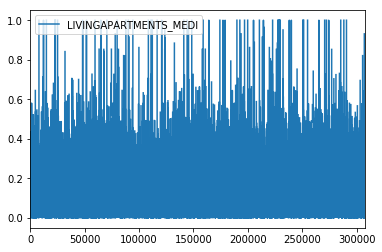

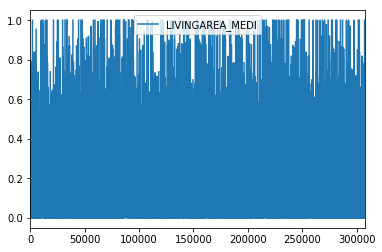

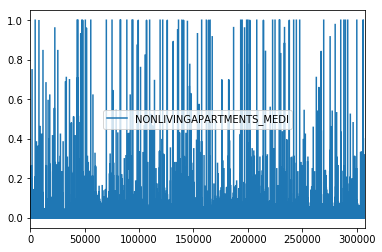

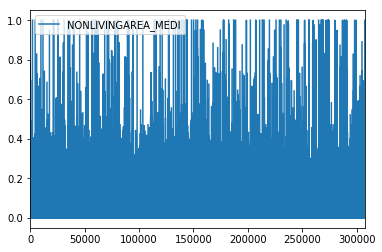

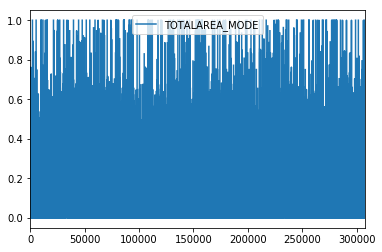

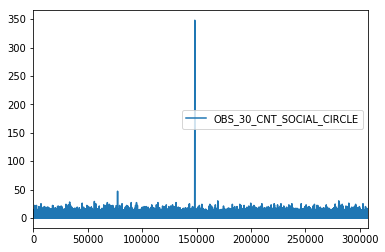

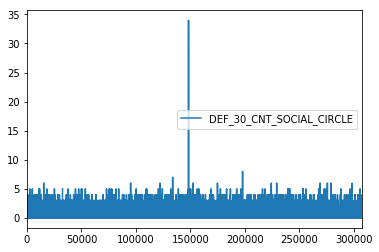

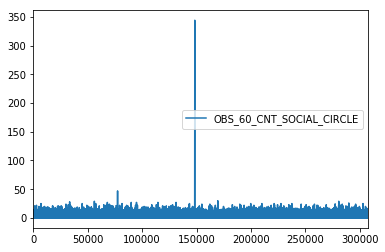

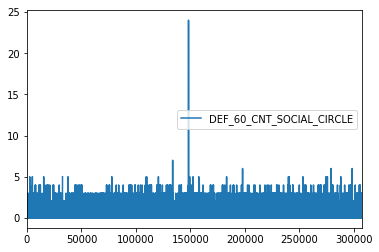

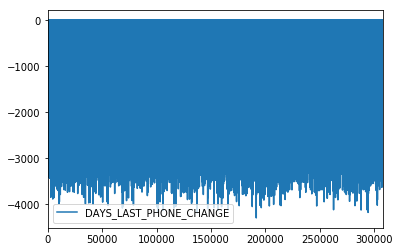

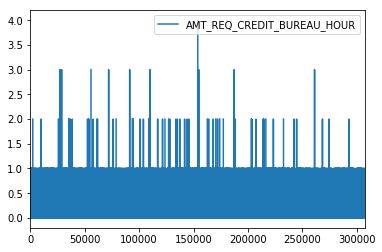

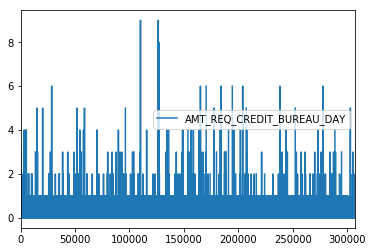

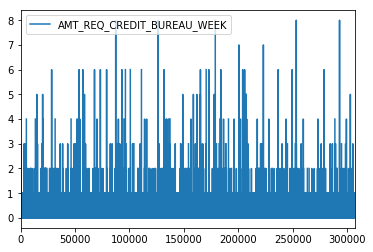

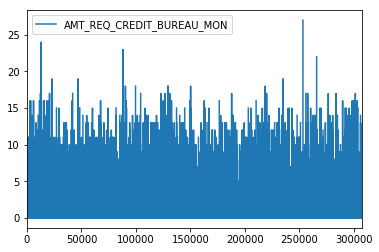

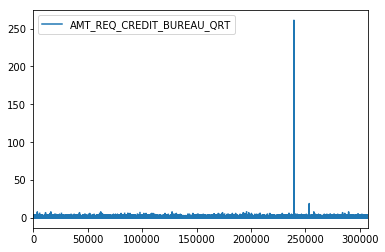

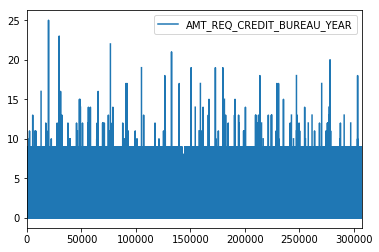

In [70]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    data = pd.DataFrame(app_train[col])
    data.plot()

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


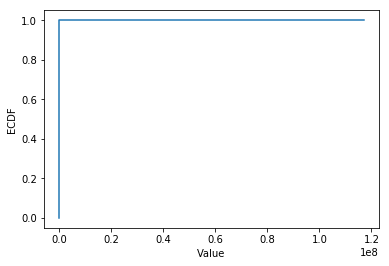

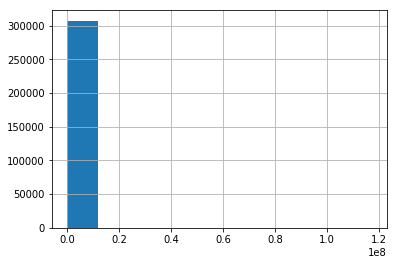

117000000.0      1
18000090.0       1
13500000.0       1
9000000.0        1
6750000.0        1
4500000.0        4
3950059.5        1
3825000.0        1
3600000.0        2
3375000.0        2
3150000.0        2
2930026.5        1
2700000.0        1
2475000.0        1
2250000.0       13
2214117.0        1
2160000.0        1
2070000.0        1
2025000.0        8
1935000.0        1
1890000.0        4
1800000.0       14
1755000.0        1
1665000.0        1
1575000.0       18
1530000.0        1
1440000.0        2
1417500.0        1
1381500.0        1
1358550.0        1
              ... 
32040.0          1
31990.5          1
31950.0          4
31860.0          1
31815.0          1
31531.5          1
31500.0        184
31050.0          1
30915.0          1
30600.0          6
30150.0          7
29700.0          3
29583.0          1
29250.0         32
29133.0          1
28800.0          3
28723.5          1
28593.0          1
28575.0          3
28404.0          1
28350.0         11
28161.0     

In [64]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

import statsmodels.api as sm 

data = np.array(app_train['AMT_INCOME_TOTAL'])
ecdf = sm.distributions.ECDF(data)
x = np.linspace(min(data), max(data))
y = ecdf(x)

plt.step(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

app_train['AMT_INCOME_TOTAL'].hist()
plt.show()
print(app_train['AMT_INCOME_TOTAL'].value_counts().sort_index(ascending = False))

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


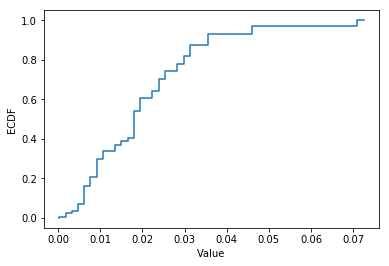

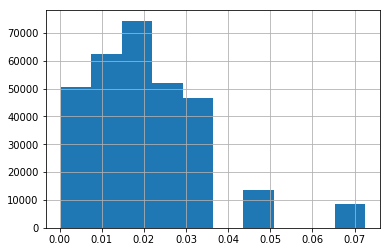

0.072508     8412
0.046220    13442
0.035792    16408
0.032561     6636
0.031329    11321
0.030755    12163
0.028663    11157
0.026392    11601
0.025164    11950
0.024610     6404
0.022800     3807
0.022625     6943
0.020713     8066
0.020246     7178
0.019689     6172
0.019101     8694
0.018850     7668
0.018801     6108
0.018634     7038
0.018209     6052
0.018029     6167
0.016612     4408
0.015221     6824
0.014520     4785
0.014464     3422
0.011703     3252
0.011657     3080
0.010966     3110
0.010643     3012
0.010556     2177
            ...  
0.007114     1684
0.007020     4105
0.006852     2435
0.006671     1653
0.006629     2818
0.006305     1672
0.006296     1225
0.006233     1087
0.006207     1936
0.006008     1796
0.005313     1218
0.005144      967
0.005084     1482
0.005002     1068
0.004960     3300
0.004849     1038
0.003818     1212
0.003813     1616
0.003541      627
0.003122     1147
0.003069     1783
0.002506      944
0.002134     1051
0.002042     1642
0.001417  

In [65]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

data = np.array(app_train['REGION_POPULATION_RELATIVE'])
ecdf = sm.distributions.ECDF(data)
x = np.linspace(min(data), max(data))
y = ecdf(x)

plt.step(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()
print(app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index(ascending = False))

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


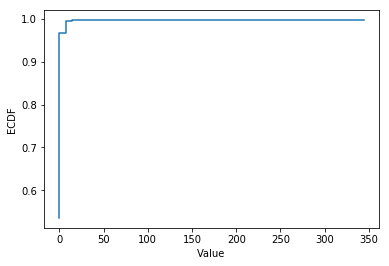

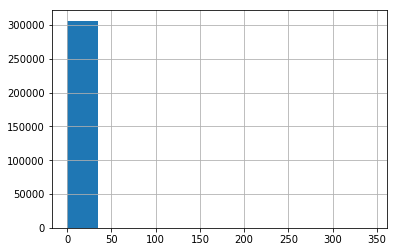

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [63]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

data = np.array(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])
ecdf = sm.distributions.ECDF(data)
x = np.linspace(min(data), max(data))
y = ecdf(x)

plt.step(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

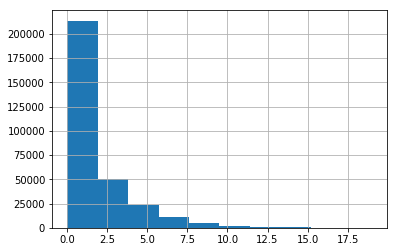

In [81]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製

data = app_train.loc[app_train.OBS_60_CNT_SOCIAL_CIRCLE < 20]
data['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()